In [3]:
import pandas as pd
import numpy as np
import ast
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [ ]:
#En primer lugar cargo y visualizo todos los datasets para saber la información con la que cuento y tener un primer panorama.
#Para no ser repetitiva, no copio el codigo de la carga de todos los datasets, sino que lo iré haciendo a medida que los vaya limpiando.


#Procedo con la limpieza de Steam Games

In [103]:
steam_games = pd.read_json('steam_games.json.gz',compression='gzip',lines=True) 


In [104]:
steam_games.head()


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [105]:
steam_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [106]:
#Elimino las filas completamente nulas

steam_games= steam_games.dropna(how='all').reset_index(drop=True)



In [107]:
#Veo las que se eliminaron
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.2+ MB


In [108]:
#Busco id nulos
steam_games[steam_games['id'].isnull()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
74,None,None,None,None,http://store.steampowered.com/,None,None,None,None,19.99,0.0,NaN,None
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


In [109]:
#En virtud que son solo 2 filas y que el dataset cuenta con mas de 30 mil, eliminarlas no generará impacto en los resultados requeridos.

#Elimino las filas
steam_games.dropna(subset=['id'],inplace=True)

In [110]:
#Busco id duplicados

duplicados = steam_games.duplicated(subset=['id'], keep=False)
duplicados_df = steam_games[duplicados]
duplicados_df


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
13894,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games
14573,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games


In [111]:
#Procedo a eliminarla

steam_games.drop_duplicates(subset=['id'], keep='first', inplace=True)


In [112]:
#Elimino las columnas que tengo la seguridad que no me van a servir para los requerimientos solicitados, 
#las que tengo dudas sobre si me servirán o no, las dejo y en caso de corresponder las elimino mas adelante.

steam_games_limpio = steam_games.drop(columns=['publisher','url','reviews_url','early_access','developer','specs'])
steam_games_limpio

,genres,app_name,title,release_date,tags,price,id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",Free To Play,643980.0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",Free to Play,670290.0
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.99,767400.0
4,None,Log Challenge,None,None,"[Action, Indie, Casual, Sports]",2.99,773570.0
...,...,...,...,...,...,...,...
32130,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.99,773640.0
32131,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,"[Strategy, Indie, Casual]",4.99,733530.0
32132,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,2018-01-04,"[Indie, Simulation, Racing]",1.99,610660.0
32133,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",4.99,658870.0


In [113]:
#Paso a transformar los datos

#Convierto los id  a tipo entero

steam_games_limpio['id'] = steam_games_limpio['id'].astype('int') 

In [114]:
#Verifico los nulos de las columnas que me quedaron

steam_games_limpio.isnull().sum()

genres          3282
app_name           1
title           2049
release_date    2066
tags             162
price           1377
id                 0
dtype: int64

In [115]:
#Veo las filas donde la columna 'genres' tiene valores nulos.

steam_games_limpio[steam_games_limpio['genres'].isna()]

,genres,app_name,title,release_date,tags,price,id
4,None,Log Challenge,None,None,"[Action, Indie, Casual, Sports]",2.99,773570
11,None,Icarus Six Sixty Six,None,None,[Casual],Free,724910
19,None,After Life VR,None,None,"[Early Access, Indie, VR]",4.99,772590
20,None,Kitty Hawk,None,None,"[Early Access, Action, Adventure, Indie, Casual]",2.99,640250
22,None,Mortars VR,None,None,"[Early Access, Strategy, Action, Indie, Casual...",0.99,711440
...,...,...,...,...,...,...,...
32118,None,Robotpencil Presents: Exercise: Brushwork,Robotpencil Presents: Exercise: Brushwork,2018-01-03,"[Design & Illustration, Tutorial]",3.99,775640
32119,None,Robotpencil Presents: Creative Composition,Robotpencil Presents: Creative Composition,2018-01-03,"[Design & Illustration, Tutorial]",3.99,777930
32120,None,The Gamble House,The Gamble House,2016-11-19,[Movie],4.99,775370
32121,None,Kalen Chock Presents: 2017 Free Tutorial,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,"[Design & Illustration, Tutorial]",Free,777950


In [116]:
# Creo un conjunto de géneros únicos 
genres = set(item for val in steam_games_limpio['genres'].dropna() for item in val)
#Se crea un conjunto (set) de géneros únicos. Itera sobre los valores no nulos de la columna 'genres' y 
#agrega cada elemento de la lista (si la columna es de tipo lista) al conjunto.

# Filtro las etiquetas de la columna 'tags' para mantener solo aquellas que están presentes en 'genres'
steam_games_limpio['tags'] = steam_games_limpio['tags'].apply(lambda x: [item for item in x if item in genres] if isinstance(x, list) else x) 
#Filtra las etiquetas de la columna 'tags', manteniendo solo aquellas que están presentes en el conjunto de géneros. 
#Se aplica a cada elemento de la columna usando una función lambda.

# Relleno las filas con valores nulos en la columna 'genres' con los valores de 'tags'
steam_games_limpio['genres'].fillna(steam_games_limpio['tags'], inplace=True)

# Elimino tags
steam_games_limpio.drop(columns=['tags'], inplace=True)


In [117]:
steam_games_limpio

,genres,app_name,title,release_date,price,id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,Free To Play,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,0.99,767400
4,"[Action, Indie, Casual, Sports]",Log Challenge,None,None,2.99,773570
...,...,...,...,...,...,...
32130,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,2018-01-04,1.99,773640
32131,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,4.99,733530
32132,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,2018-01-04,1.99,610660
32133,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,658870


In [118]:
# Creo dummies para genres 

steam_games_limpio['genres'] =  steam_games_limpio['genres'].apply(lambda x:".".join(x) if isinstance(x, list) else x)
#Combino las listas de géneros en una sola cadena, separando los elementos con puntos. Esto es útil para luego crear variables dummy.

dummies = steam_games_limpio['genres'].str.get_dummies(sep='.')
#creo variables dummy a partir de la columna 'genres'. La función str.get_dummies divide las cadenas separadas por puntos en columnas de variables dummy

steam_games_limpio = pd.concat([steam_games_limpio,dummies],axis=1)
#Concateno el DataFrame original steam_games_limpio con el DataFrame de dummies 

# Elimino la columna genres
steam_games_limpio.drop(columns='genres',inplace=True)


In [119]:
steam_games_limpio

,app_name,title,release_date,price,id,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Ironbound,Ironbound,2018-01-04,Free To Play,643980,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,弹炸人2222,弹炸人2222,2017-12-07,0.99,767400,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,None,None,2.99,773570,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Colony On Mars,Colony On Mars,2018-01-04,1.99,773640,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32131,LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,4.99,733530,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32132,Russian Roads,Russian Roads,2018-01-04,1.99,610660,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
32133,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,658870,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#Elimino la columnas que NO son generos de video juegos 

columnas_a_eliminar = [
    'Animation &amp; Modeling',
    'Audio Production',
    'Design &amp; Illustration',
    'Early Access',
    'Education',
    'Free to Play',
    'Photo Editing',
    'Software Training',
    'Utilities',
    'Video Production',
    'Web Publishing'
]

# Eliminar las columnas que no son géneros de videojuegos
steam_games_limpio = steam_games_limpio.drop(columnas_a_eliminar, axis=1)

steam_games_limpio


,app_name,title,release_date,price,id,Accounting,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,0,1,0,1,1,0,0,0,1,0,1
1,Ironbound,Ironbound,2018-01-04,Free To Play,643980,0,0,0,0,1,0,1,0,0,0,1
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290,0,0,0,1,1,0,0,0,1,1,0
3,弹炸人2222,弹炸人2222,2017-12-07,0.99,767400,0,1,1,1,0,0,0,0,0,0,0
4,Log Challenge,None,None,2.99,773570,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Colony On Mars,Colony On Mars,2018-01-04,1.99,773640,0,0,0,1,1,0,0,0,1,0,1
32131,LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,4.99,733530,0,0,0,1,1,0,0,0,0,0,1
32132,Russian Roads,Russian Roads,2018-01-04,1.99,610660,0,0,0,0,1,0,0,1,1,0,0
32133,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,658870,0,0,0,1,1,0,0,0,0,0,0


In [121]:
#elimino accounting que tampoco es un genero de video juego
steam_games_limpio = steam_games_limpio.drop('Accounting', axis=1)

In [123]:
#Transformo el tipo de dato de id a entero

steam_games_limpio['id'] = steam_games_limpio['id'].astype(int)

In [124]:
#Transformo Price
#Reemplazo los valores free a 0

steam_games_limpio['price'] = steam_games_limpio['price'].replace(['Free to Play','Free Demo','Free HITMANâ„¢ Holiday Pack','Play the Demo','Free Mod','Play WARMACHINE: Tactics Demo','Free To Play','Free'], 0)


In [125]:
#Reemplazo registros extraños por NaN 
steam_games_limpio['price'] = steam_games_limpio['price'].replace(['Install Theme','Third-party','Starting at $','Starting at $','Play Now','Starting at $499.00','Starting at $449.00'], 'NaN')


In [126]:
# Veo la cantidad de valores nulos en la columna 'price'
steam_games_limpio['price'].isnull().sum()

#en esta primer etapa de limpieza las dejaré, dado que el precio no es una cuestion troncal en las funciones solicitadas
#posteriormente veré si puedo optimizar el dataset

1377

In [127]:
#verifico el tipo de valores de la columna relese date, ya que es un dato clave para crear algunas funciones pedidas por la empresa

valores_unicos = steam_games_limpio['release_date'].unique()
print(valores_unicos)

['2018-01-04' '2017-07-24' '2017-12-07' ... '2016-11-19' 'January 2018'
 '2018-10-01']


In [128]:
# Convierto 'release_date' a datetime 
steam_games_limpio['release_date'] = pd.to_datetime(steam_games_limpio['release_date'], errors='coerce')

# Me quedo con el año de las fechas
steam_games_limpio['release_date'] = steam_games_limpio['release_date'].dt.year

# Utilizo fillna para asignarle 0 a los valores nulos
steam_games_limpio['release_date'] = steam_games_limpio['release_date'].fillna(0)

#Transformo a enteros la columna
steam_games_limpio['release_date'] = steam_games_limpio['release_date'].astype(int)

In [129]:
steam_games_limpio

,app_name,title,release_date,price,id,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,761140,1,0,1,1,0,0,0,1,0,1
1,Ironbound,Ironbound,2018,0,643980,0,0,0,1,0,1,0,0,0,1
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017,0,670290,0,0,1,1,0,0,0,1,1,0
3,弹炸人2222,弹炸人2222,2017,0.99,767400,1,1,1,0,0,0,0,0,0,0
4,Log Challenge,None,0,2.99,773570,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Colony On Mars,Colony On Mars,2018,1.99,773640,0,0,1,1,0,0,0,1,0,1
32131,LOGistICAL: South Africa,LOGistICAL: South Africa,2018,4.99,733530,0,0,1,1,0,0,0,0,0,1
32132,Russian Roads,Russian Roads,2018,1.99,610660,0,0,0,1,0,0,1,1,0,0
32133,EXIT 2 - Directions,EXIT 2 - Directions,2017,4.99,658870,0,0,1,1,0,0,0,0,0,0


In [130]:
steam_games_limpio.isnull().sum()

app_name                    1
title                    2049
release_date                0
price                    1377
id                          0
Action                      0
Adventure                   0
Casual                      0
Indie                       0
Massively Multiplayer       0
RPG                         0
Racing                      0
Simulation                  0
Sports                      0
Strategy                    0
dtype: int64

In [131]:
#Creo un archivo csv con el dataset limpio, de manera de guardar los cambios para un posterior analisis

steam_games_limpio.to_csv('steam_games_limpio.csv',index=False)

In [ ]:
#Limpieza de User Review

In [6]:
#La siguiente funcion tiene como objetivo cargar datos desde un archivo comprimido en formato JSON (que tiene datos anidados)
# y crear un DataFrame de pandas con esos datos.

archivo_reviews = "user_reviews.json.gz"
filas=[]         
#lista que almacenará las líneas del archivo
                                                       
with gzip.open(archivo_reviews, 'rt', encoding='utf-8') as archivo:     
    for line in archivo.readlines(): # Abre el archivo comprimido y lo lee línea por línea
        filas.append(ast.literal_eval(line))
                                            #Para cada línea, se utiliza ast.literal_eval para evaluar la expresión literal de la línea 
                                            # y convertirla en un objeto de Python. literal_eval es una función del módulo ast que evalúa 
                                            # expresiones literales de Python de manera segura. Aqui asume que cada línea del 
                                            # archivo contiene una expresión literal de un diccionario en formato de cadena de texto.
user_reviews = pd.DataFrame(filas)

In [7]:
user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [8]:
#visualizo de forma completa algunas filas del data frame

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(user_reviews)

                 user_id  \
0      76561197970982479   
1                js41637   
2              evcentric   
3                  doctr   
4              maplemage   
...                  ...   
25794  76561198306599751   
25795           Ghoustik   
25796  76561198310819422   
25797  76561198312638244   
25798        LydiaMorley   

                                                   user_url  \
0      http://steamcommunity.com/profiles/76561197970982479   
1                      http://steamcommunity.com/id/js41637   
2                    http://steamcommunity.com/id/evcentric   
3                        http://steamcommunity.com/id/doctr   
4                    http://steamcommunity.com/id/maplemage   
...                                                     ...   
25794  http://steamcommunity.com/profiles/76561198306599751   
25795                 http://steamcommunity.com/id/Ghoustik   
25796  http://steamcommunity.com/profiles/76561198310819422   
25797  http://steamcommunity.com/

In [ ]:
#Cada fila de la columna reviews contiene una lista de diccionarios, cada diccionario contiene la opinion del usuario por cada juego, entre otros datos
#Dadas las funciones solicitadas por la empresa, necesito preservar y manipular esas opiniones
#Por eso utilizo el metodo explode, que permite extraer los datos de la columna, se duplicará tantas veces como diccionarios haya en esa lista
#eso me permite separar la opinion del usuario por cada juego

#también uso el metodo apply y pd.Series 

In [9]:
user_review_normalizado = user_reviews.explode('reviews') # multiplico las filas por cada diccionario
user_review_normalizado 

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}"
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'It's unique and worth a playthrough.'}"
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}"
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}"
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', 'recommend': True, 'review': 'For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it.'}"
...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'last_edited': '', 'item_id': '70', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'a must have classic from steam definitely worth buying.'}"
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'last_edited': '', 'item_id': '362890', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.'}"
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', 'posted': 'Posted July 3.', 'last_edited': '', 'item_id': '273110', 'helpful': '1 of 2 people (50%) found this review helpful', 'recomm

In [10]:
user_review_normalizado = pd.concat([user_review_normalizado.drop(['reviews'],axis=1),
                                     #elimina la columna reviews
                                     user_review_normalizado['reviews'].apply(pd.Series)],axis=1) 
                                     #convierte cada elememto del diccionario (clave) en una columna con su correspondiente valor (fila)
user_review_normalizado

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare.",NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8",NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it.",NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely worth buying.,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting resources xD we won on my first try and killed final boss!,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [11]:
#elimino las columnas que no me aportan valor para las funciones
#de manera de facilitar la exploracion de datos y futura carga

user_review_normalizado.drop(columns=['user_url','funny','helpful','last_edited',0],inplace=True)

user_review_normalizado




,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare."
0,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!
1,js41637,"Posted June 24, 2014.",251610,True,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8"
1,js41637,"Posted September 8, 2013.",227300,True,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it."
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely worth buying.
25797,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.
25798,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting resources xD we won on my first try and killed final boss!
25798,LydiaMorley,Posted July 20.,730,True,:D


In [12]:

from nltk.sentiment import SentimentIntensityAnalyzer

# Descargo el léxico necesario para SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Creo una instancia de SentimentIntensityAnalyzer, que se utilizará para calcular la puntuación de polaridad de los textos.
sia = SentimentIntensityAnalyzer()

# Función para asignar etiquetas de sentimiento
def etiquetar_sentimiento(texto):
    if pd.notnull(texto):  # primero verifica si el valor no es nulo
        score = sia.polarity_scores(texto)['compound']
        #sia es la instancia creada al principio 
        #sia.polarity_scores(texto): Llama al método polarity_scores de SentimentIntensityAnalyzer y le pasa el texto como argumento. 
        # Este método devuelve un diccionario con varias puntuaciones, incluyendo la puntuación de compuesto.
        #['compound']: Accede al valor correspondiente a la clave 'compound' en el diccionario devuelto por polarity_scores. 
        # el valor obtenido es asignado a la variable score



        # Asigno etiquetas (0, 1, 2) a la puntuación de compuesto (score)
        if score >= 0.05:
            return 2  # Sentimiento positivo
        elif -0.05 < score < 0.05:
            return 1  # Sentimiento neutro
        else:
            return 0  # Sentimiento negativo
    else:
        return 1  # cuando es nulo retorna 1
    
# Aplico la función a la columna 'review' y creo con los resultados una nueva columna 'sentimiento'
user_review_normalizado['sentimiento'] = user_review_normalizado['review'].apply(etiquetar_sentimiento)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
user_review_normalizado 

,user_id,posted,item_id,recommend,review,sentimiento
0,76561197970982479,"Posted November 5, 2011.",1250,True,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare.",2
0,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.,2
0,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!,2
1,js41637,"Posted June 24, 2014.",251610,True,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8",2
1,js41637,"Posted September 8, 2013.",227300,True,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it.",2
...,...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely worth buying.,2
25797,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.,2
25798,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting resources xD we won on my first try and killed final boss!,2
25798,LydiaMorley,Posted July 20.,730,True,:D,2


In [14]:
# Cuento la cantidad de valores únicos en la columna 'sentimiento'
conteo_sentimientos = user_review_normalizado['sentimiento'].value_counts()

print(conteo_sentimientos)


sentimiento
2    37417
1    12304
0     9612
Name: count, dtype: int64


In [15]:
# Veo la cantidad de valores nulos en el DataFrame
nulos_por_columna = user_review_normalizado.isnull().sum()

print(nulos_por_columna)


user_id         0
posted         28
item_id        28
recommend      28
review         28
sentimiento     0
dtype: int64


In [16]:
#visualizo cuales son los nulos

filas_nulas = user_review_normalizado[user_review_normalizado.isnull().any(axis=1)]

print(filas_nulas)


                 user_id posted item_id recommend review  sentimiento
62                 gdxsd    NaN     NaN       NaN    NaN            1
83     76561198094224872    NaN     NaN       NaN    NaN            1
1047   76561198021575394    NaN     NaN       NaN    NaN            1
3954             cmuir37    NaN     NaN       NaN    NaN            1
5394           Jaysteeny    NaN     NaN       NaN    NaN            1
6135              ML8989    NaN     NaN       NaN    NaN            1
7583   76561198079215291    NaN     NaN       NaN    NaN            1
7952   76561198079342142    NaN     NaN       NaN    NaN            1
9894   76561198061996985    NaN     NaN       NaN    NaN            1
10381  76561198108286351    NaN     NaN       NaN    NaN            1
10560     CallTripleZero    NaN     NaN       NaN    NaN            1
11316       Priceless612    NaN     NaN       NaN    NaN            1
11320      diabolical666    NaN     NaN       NaN    NaN            1
11549         DrScot

In [17]:
#Los 28 nulos de user_id (valor que me interesa) coinciden con los demás nulos, por lo que eliminaré esas filas

user_review_normalizado = user_review_normalizado.dropna()

In [18]:
# Elimino la columna review conforme lo solicitado
user_review_normalizado = user_review_normalizado.drop('review', axis=1)


In [19]:
#Ahora transformo la columna 'recommend', si fue recomendada valor 1, si no fue recomendada valor 0
user_review_normalizado['recommend'] = user_review_normalizado['recommend'].replace({True:1, False:0})


In [20]:
user_review_normalizado

,user_id,posted,item_id,recommend,sentimiento
0,76561197970982479,"Posted November 5, 2011.",1250,1,2
0,76561197970982479,"Posted July 15, 2011.",22200,1,2
0,76561197970982479,"Posted April 21, 2011.",43110,1,2
1,js41637,"Posted June 24, 2014.",251610,1,2
1,js41637,"Posted September 8, 2013.",227300,1,2
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,1,2
25797,76561198312638244,Posted July 8.,362890,1,2
25798,LydiaMorley,Posted July 3.,273110,1,2
25798,LydiaMorley,Posted July 20.,730,1,2


In [21]:
#Creo un archivo csv con el dataset limpio, de manera de guardar los cambios para un posterior analisis

user_review_normalizado.to_csv('user_review_normalizado.csv',index=False)

In [ ]:
#USERS ITEMS

In [43]:
#Por una cuestion de volumen del dataset, no puedo repetir el mismo procedimiento que user_reviews


 
def normalizar_json(items_json, columna_anidada):
    #Función que descomprime y desanida el archivo users_items
    fila = [] # Lista que almacenará las líneas del archivo

    with gzip.open(items_json, 'rt', encoding='MacRoman') as archivo: # Abro el archivo, lo leo y lo convierto en un objeto Python usando ast.literal_eval
      for line in archivo.readlines():
          fila.append(ast.literal_eval(line))

    df = pd.DataFrame(fila)                                  #Convierto la lista de objetos en un DataFrame de Pandas               
    df = df.explode(columna_anidada).reset_index()          #Divido las listas anidadas en filas separadas y restablezco el índice               
    df = df.drop(columns="index")                            # Elimino la columna de índice adicional generada por reset_index               
    df = pd.concat([df, pd.json_normalize(df[columna_anidada])], axis=1)   # Normalizo las columnas anidadas en el DataFrame principal
    df = df.drop(columns=columna_anidada)                                  #Elimino la columna anidada original

    return df

In [44]:
user_items = normalizar_json("users_items.json.gz",'items')

In [45]:
user_items 

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4.0,4.0
5170013,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,519140,Minds Eyes,3.0,3.0


In [46]:
user_items.isnull().sum() #veo la cantidad de columnas que tienen filas nulas

user_id                 0
items_count             0
steam_id                0
user_url                0
item_id             16806
item_name           16806
playtime_forever    16806
playtime_2weeks     16806
dtype: int64

In [47]:
user_items[user_items['item_id'].isna()]

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
3733,Wackky,0,76561198039117046,http://steamcommunity.com/id/Wackky,NaN,NaN,NaN,NaN
3849,76561198079601835,0,76561198079601835,http://steamcommunity.com/profiles/76561198079...,NaN,NaN,NaN,NaN
6019,hellom8o,0,76561198117222320,http://steamcommunity.com/id/hellom8o,NaN,NaN,NaN,NaN
6523,starkillershadow553,0,76561198059648579,http://steamcommunity.com/id/starkillershadow553,NaN,NaN,NaN,NaN
7237,darkenkane,0,76561198058876001,http://steamcommunity.com/id/darkenkane,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5169470,76561198316380182,0,76561198316380182,http://steamcommunity.com/profiles/76561198316...,NaN,NaN,NaN,NaN
5169471,76561198316970597,0,76561198316970597,http://steamcommunity.com/profiles/76561198316...,NaN,NaN,NaN,NaN
5169472,76561198318100691,0,76561198318100691,http://steamcommunity.com/profiles/76561198318...,NaN,NaN,NaN,NaN
5170006,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,NaN,NaN,NaN,NaN


In [48]:
#las columnas con filas nulas coinciden,
# como la demas info que hay en las filas se torna irrelevante sin esos datos, las elimino

user_items.dropna(inplace=True)

In [49]:
#Elimino columnas que no tiene informacion relevante para el pedido de la empresa

user_items = user_items.drop(columns=['user_url','playtime_2weeks','steam_id', 'items_count'])


In [50]:
user_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0
...,...,...,...,...
5170009,76561198329548331,346330,BrainBread 2,0.0
5170010,76561198329548331,373330,All Is Dust,0.0
5170011,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5170012,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [53]:
# Convertir las columnas a tipo de dato entero
columns_to_convert = ['playtime_forever', 'item_id']

user_items[columns_to_convert] = user_items[columns_to_convert].astype(int)

# Verificar el cambio
print(user_items.dtypes)



user_id             object
item_id              int32
item_name           object
playtime_forever     int32
dtype: object


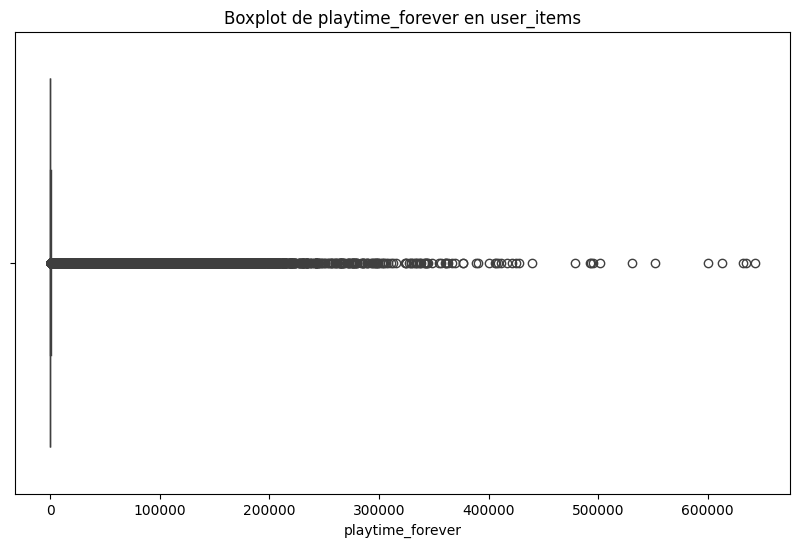

In [54]:
#Reviso outlier en playtime forever

plt.figure(figsize=(10, 6))
sns.boxplot(x=user_items['playtime_forever'])
plt.title('Boxplot de playtime_forever en user_items')
plt.show()


In [56]:

# Obtener los 50 valores más altos de la columna playtime_forever
top_50_values = user_items.nlargest(50, 'playtime_forever')['playtime_forever']

# Mostrar los 50 valores más altos
print(top_50_values)


588431     642773
2502384    635295
4081955    632452
1497163    613411
1839184    600068
237215     551719
1930476    530882
2909317    501498
3217366    495058
1027541    493791
2423750    492810
3853235    479117
3332306    439912
231920     428012
442490     425437
1980238    421652
237295     416471
711289     411019
1426809    408492
3730878    406717
871685     405906
29942      400827
1696812    389954
2342121    388621
460218     376859
1992373    376267
466148     369597
191109     366892
704885     363147
2980875    361496
2981056    361496
3350844    359974
2779229    356217
1115841    354445
3838768    348771
4506676    344931
1849698    344266
410849     342885
2624109    342805
1464079    341723
2401251    341141
1178673    338572
4500734    337453
920927     336763
2017987    335029
234879     333482
2342134    332493
4031369    331437
1448039    329639
3222250    328984
Name: playtime_forever, dtype: int32


In [62]:
# Configurar Pandas para mostrar números decimales completos
pd.set_option('display.float_format', '{:.2f}'.format)

# los valores se mostrarán sin notación científica
print(user_items.describe())


         item_id  playtime_forever
count 5153209.00        5153209.00
mean   178448.14            991.50
std    131859.78           5418.20
min        10.00              0.00
25%     34460.00              0.00
50%    214420.00             34.00
75%    266430.00            355.00
max    530720.00         642773.00


In [ ]:
#Como no se la unidad de medida de la columna playtime_forever, voy a dar por finalizada la normalización en esta primera etapa
#en la segunda etapa analizare los datos en general con mayor profundidad y veré que hacer con los outlier

In [63]:

#Exporto dataset limpio

user_items.to_csv('users_item_normalizado.csv',index=False)


In [64]:
with gzip.open('user_items_normalizado.csv.gz', 'wb') as f:
    user_items.to_csv(f, index=False, encoding='utf-8')

In [ ]:
#Exploración y Analisis de Datos
#
#
#
#

In [132]:
steam_games_limpio = pd.read_csv("steam_games_limpio.csv")
steam_games_limpio

,app_name,title,release_date,price,id,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,761140,1,0,1,1,0,0,0,1,0,1
1,Ironbound,Ironbound,2018,0,643980,0,0,0,1,0,1,0,0,0,1
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017,0,670290,0,0,1,1,0,0,0,1,1,0
3,弹炸人2222,弹炸人2222,2017,0.99,767400,1,1,1,0,0,0,0,0,0,0
4,Log Challenge,NaN,0,2.99,773570,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32127,Colony On Mars,Colony On Mars,2018,1.99,773640,0,0,1,1,0,0,0,1,0,1
32128,LOGistICAL: South Africa,LOGistICAL: South Africa,2018,4.99,733530,0,0,1,1,0,0,0,0,0,1
32129,Russian Roads,Russian Roads,2018,1.99,610660,0,0,0,1,0,0,1,1,0,0
32130,EXIT 2 - Directions,EXIT 2 - Directions,2017,4.99,658870,0,0,1,1,0,0,0,0,0,0


In [133]:
# Calculoo la suma de valores nulos 
cantidad_nulos = steam_games_limpio.isnull().sum().sum()


print(f"La cantidad total de valores nulos en steam_games_limpio es: {cantidad_nulos}")


La cantidad total de valores nulos en steam_games_limpio es: 3434


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


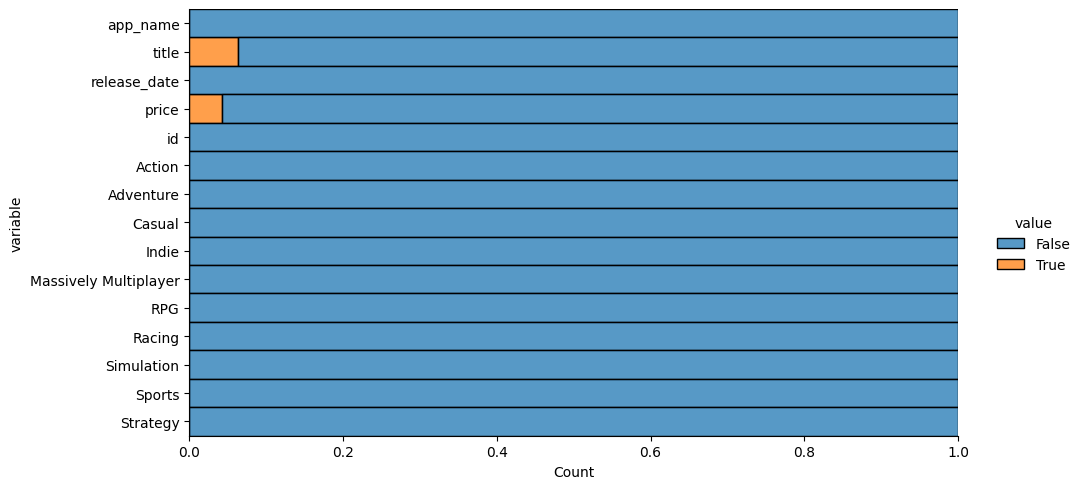

In [134]:
#Creo un grafico de distribución (displot) para representaa la proporción de valores nulos 
#teniendo en cuenta que el precio y title, no es uno de los pilares de las funciones solicitadas, no lo modifico

sns.displot(
    steam_games_limpio.isna().melt(), y='variable', hue='value', multiple='fill', aspect=2
)


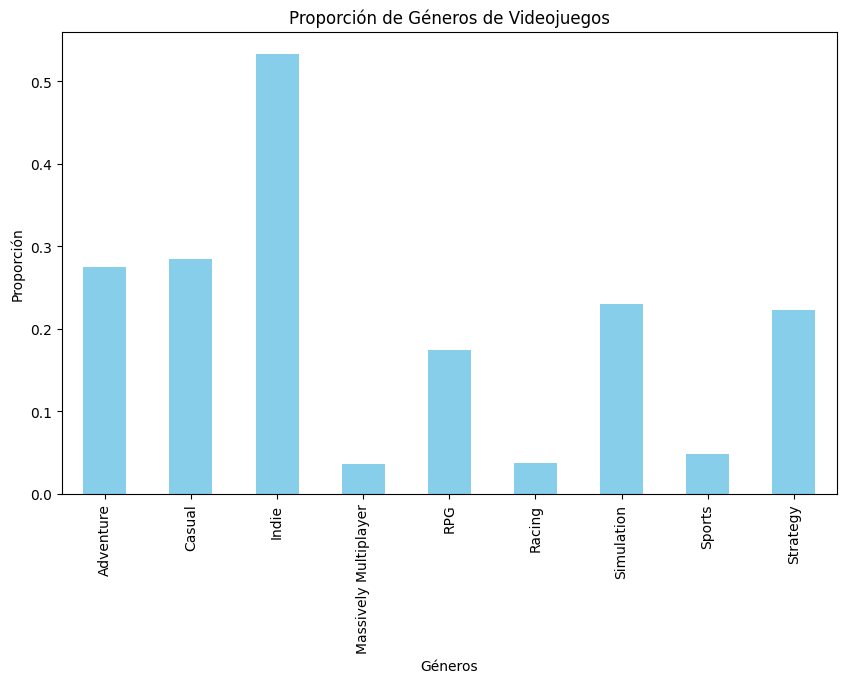

In [135]:
# Obtengo la proporción de cada género
proporciones = steam_games_limpio.iloc[:, 6:].sum() / len(steam_games_limpio)

# la visualizo
plt.figure(figsize=(10, 6))
proporciones.plot(kind='bar', color='skyblue')
plt.title('Proporción de Géneros de Videojuegos')
plt.xlabel('Géneros')
plt.ylabel('Proporción')
plt.show()


In [29]:
user_review_limpio = pd.read_csv("user_review_normalizado.csv")
user_review_limpio

,user_id,posted,item_id,recommend,sentimiento
0,76561197970982479,"Posted November 5, 2011.",1250,1,2
1,76561197970982479,"Posted July 15, 2011.",22200,1,2
2,76561197970982479,"Posted April 21, 2011.",43110,1,2
3,js41637,"Posted June 24, 2014.",251610,1,2
4,js41637,"Posted September 8, 2013.",227300,1,2
...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,70,1,2
59301,76561198312638244,Posted July 8.,362890,1,2
59302,LydiaMorley,Posted July 3.,273110,1,2
59303,LydiaMorley,Posted July 20.,730,1,2


In [33]:
# Obtener 20 filas aleatorias de la columna 'posted'
user_review_limpio['posted'].sample(n=20, random_state=42)  



46217          Posted May 13, 2014.
22090      Posted December 6, 2011.
8478       Posted October 16, 2015.
35189         Posted March 5, 2014.
41594         Posted April 3, 2014.
48804      Posted November 2, 2014.
36029          Posted May 17, 2015.
27055       Posted August 16, 2013.
7528          Posted July 10, 2011.
40548         Posted July 13, 2012.
37824        Posted April 17, 2015.
5070             Posted February 4.
58750     Posted December 30, 2015.
5073          Posted March 6, 2014.
35848        Posted April 19, 2014.
34713          Posted July 2, 2014.
15433          Posted May 31, 2015.
6111       Posted January 26, 2014.
11868     Posted November 13, 2015.
41649    Posted September 23, 2014.
Name: posted, dtype: object

In [34]:
#Dado que para los requerimientos de la empresa es importante el año del posteo de la recomendacion, lo extraigo

# Defino una función para extraer el año usando expresiones regulares
def extraer_año(fecha):
    match = re.search(r'\b\d{4}\b', str(fecha))
    return int(match.group()) if match else None

# Aplico la función a la columna 'posted' para extraer solo el año
user_review_limpio['año_posted'] = user_review_limpio['posted'].apply(extraer_año)



In [40]:
# Veo el resultado
user_review_limpio.head(20)

,user_id,posted,item_id,recommend,sentimiento,año_posted
0,76561197970982479,"Posted November 5, 2011.",1250,1,2,2011.0
1,76561197970982479,"Posted July 15, 2011.",22200,1,2,2011.0
2,76561197970982479,"Posted April 21, 2011.",43110,1,2,2011.0
3,js41637,"Posted June 24, 2014.",251610,1,2,2014.0
4,js41637,"Posted September 8, 2013.",227300,1,2,2013.0
5,js41637,"Posted November 29, 2013.",239030,1,2,2013.0
6,evcentric,Posted February 3.,248820,1,2,NaN
7,evcentric,"Posted December 4, 2015.",370360,1,2,2015.0
8,evcentric,"Posted November 3, 2014.",237930,1,2,2014.0
9,evcentric,"Posted October 15, 2014.",263360,1,1,2014.0


In [43]:
# Convierto la columna 'año_posted' a valores enteros
user_review_limpio['año_posted'] = user_review_limpio['año_posted'].astype('Int64')



In [44]:
#Cuento los valores nulos de posted

user_review_limpio.isnull().sum()

user_id            0
posted             0
item_id            0
recommend          0
sentimiento        0
año_posted     10119
dtype: int64

In [45]:
#Dado que varias de las funciones que debo desarrollar tienen como base el año de publicación de la recomendación 
#elimino las filas que tienen valores nulos en esa columna

user_review_limpio = user_review_limpio.dropna(subset=['año_posted'])

In [46]:
#elimino la columna posted

user_review_limpio = user_review_limpio.drop(columns=['posted'])



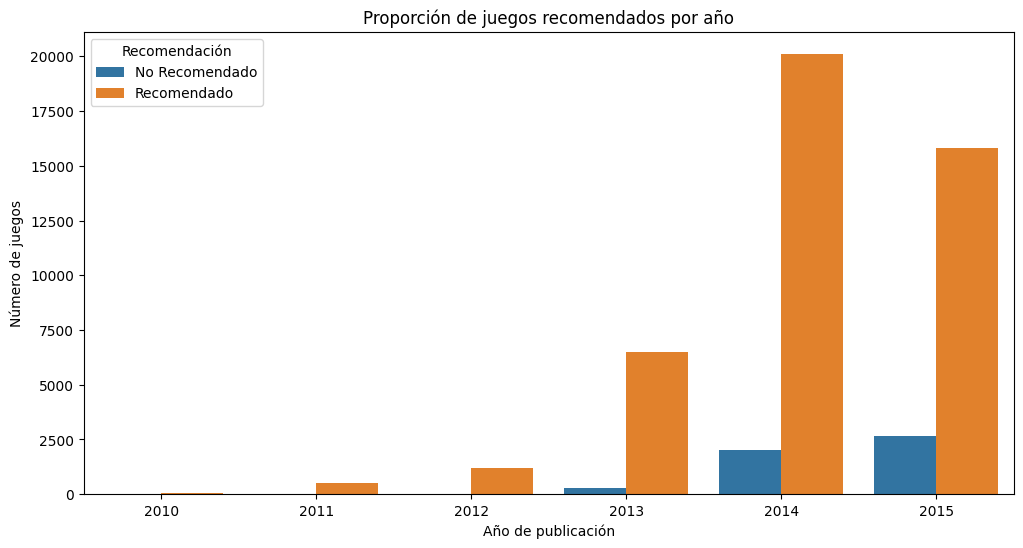

In [47]:
# Crear un gráfico de barras apiladas para la proporción de recomendaciones por año
plt.figure(figsize=(12, 6))
sns.countplot(x='año_posted', hue='recommend', data=user_review_limpio)

# Personalizar el gráfico
plt.title('Proporción de juegos recomendados por año')
plt.xlabel('Año de publicación')
plt.ylabel('Número de juegos')
plt.legend(title='Recomendación', labels=['No Recomendado', 'Recomendado'])

# Mostrar el gráfico
plt.show()


In [50]:
#vuelvo a crear y guardar en csv los cambios generados, porque fueron significativos
user_review_limpio.to_csv('user_review_limpio.csv',index=False)

In [6]:
user_items_limpio = pd.read_csv("users_item_normalizado.csv")
user_items_limpio

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4


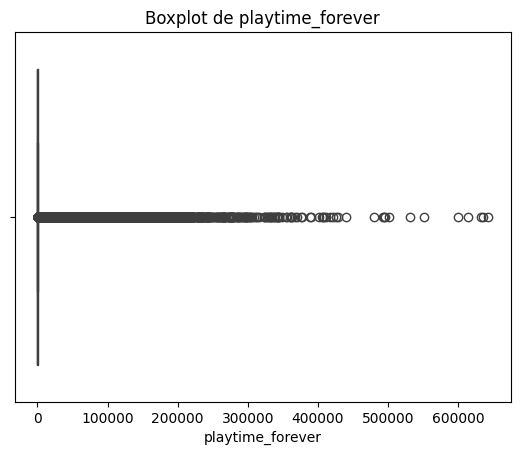

In [14]:
#Analizo si hay outlier en el tiempo de juego Playtime_forever

sns.boxplot(x=user_items_limpio['playtime_forever'])

# Ajusta el título y las etiquetas del eje según tus preferencias
plt.title('Boxplot de playtime_forever')
plt.xlabel('playtime_forever')

# Muestra el gráfico
plt.show()


In [19]:


#Analizo los valores mas bajos de release_date
top_5_unique_oldest = steam_games_limpio[steam_games_limpio['release_date'] != 0]['release_date'].nsmallest(5).unique()

top_5_unique_oldest




array([1970, 1975, 1980, 1981], dtype=int64)

In [20]:
# En primer lugar en la base de datos no se ha consignado la unidad de medida que contiene la columna playtime_forever, 
#pero por una cuestión de sentido común y fechas de lanzamiento de los juegos, se presumirá que son minutos
#ademas que no nos piden que especifiquemos el tiempo, sino hacer ranking, por eso no se eliminarán outlier